In [ ]:
# Membuat Product Recommendation System menggunakan algoritma User Based Collaborative Filtering
# Menggunakan dataset Amazon - Ratings

# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Membaca dataset Amazon Beauty dari file CSV
amazon_ratings = pd.read_csv('./drive/MyDrive/Project_Sistem_Cerdas/amazon-ratings/ratings_Beauty.csv')
# Menghapus baris dengan nilai null
amazon_ratings = amazon_ratings.dropna()
# Menampilkan beberapa baris data pertama
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1.369699e+09
1,A3JM6GV9MNOF9X,0558925278,3.0,1.355443e+09
2,A1Z513UWSAAO0F,0558925278,5.0,1.404691e+09
3,A1WMRR494NWEWV,0733001998,4.0,1.382573e+09
4,A3IAAVS479H7M7,0737104473,1.0,1.274227e+09


In [ ]:
# Menampilkan ukuran dataset
amazon_ratings.shape

(334567, 4)

In [ ]:
# Membuat dataframe untuk produk yang paling populer
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())
# Mengurutkan produk berdasarkan jumlah rating yang diberikan
most_popular = popular_products.sort_values('Rating', ascending=False)
# Menampilkan 10 produk paling populer
most_popular.head(10)

,Rating
ProductId,
B0009V1YR8,2869
B0000YUXI0,2143
B000FS05VG,1589
B000142FVW,1558
B00021DVCQ,1051
B0002JKPA4,1046
B000L596FE,992
B000ASDGK8,888
B000HRVC5I,885


<Axes: xlabel='ProductId'>

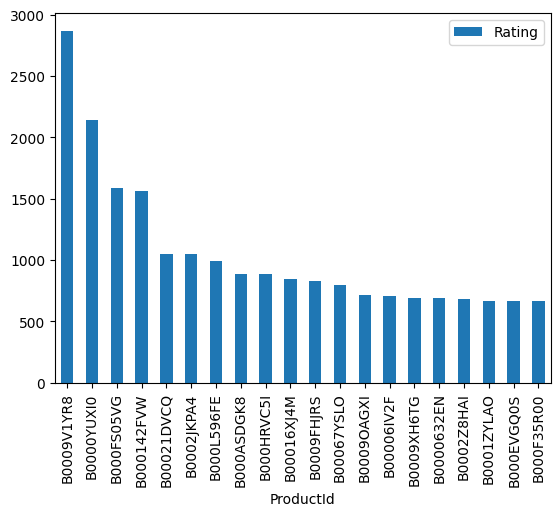

In [ ]:
# Tampilan berupa grafik
most_popular.head(20).plot(kind = "bar")

In [ ]:
# Membuat model collaborative filtering

# Mengambil sebagian kecil data Amazon untuk analisis
amazon_ratings1 = amazon_ratings.head(10000)

In [ ]:
# Membuat matriks utilitas rating
# Mengubah dataframe/matrix dengan rating 0 pada setiap produk yang tidak dirating oleh user
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating',
                                                     index='UserId',
                                                     columns='ProductId',
                                                     fill_value=0)
# Menampilkan beberapa baris data pertama dari matriks utilitas rating
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A024581134CV80ZBLIZTZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03056581JJIOL5FSKJY7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A03099101ZRK4K607JVHH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0505229A7NSH3FRXRR4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menampilkan ukuran matriks utilitas rating
ratings_utility_matrix.shape

(9697, 886)

In [ ]:
# Transpose matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0558925278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0733001998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0737104473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0762451459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menampilkan ukuran matriks yang telah di-transpose
X.shape

(886, 9697)

In [ ]:
# Inisialisasi variabel untuk data "unik" yang telah dibuat
X1 = X

In [ ]:
# Menggunakan TruncatedSVD untuk mengurangi dimensi data
# Menyederhanakan matriks utilitas rating menjadi lebih ringkas dengan jumlah 10 komponen utama
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)

In [ ]:
# Menghitung matriks korelasi dari matriks yang telah diurangkan dimensinya
correlation_matrix = np.corrcoef(decomposed_matrix)

In [ ]:
# Penggunaan model

# Memilih salah satu produk sebagai produk acuan (bisa diganti)
i = str(X.index[50])
# ==========================================================================================================
# Mendapatkan daftar nama produk
product_names = list(X.index)
# Mendapatkan indeks dari produk acuan
product_ID = product_names.index(i)
# ==========================================================================================================
# Mengambil tingkat korelasi produk dengan produk acuan
# Berisi nilai korelasi antara produk acuan dan semua produk lain dalam dataset
correlation_product_ID = correlation_matrix[product_ID]
# ==========================================================================================================
# Membuat rekomendasi berdasarkan tingkat korelasi diatas 90%
Recommend = list(X.index[correlation_product_ID > 0.90])
# Menghilangkan produk yang user pilih agar tidak ditampilkan
Recommend.remove(i)
# Produk ini akan ditampilkan sistem rekomendasi kepada user berdasarkan riwayat rating user lain
# Menampilkan produk acuan
print("Produk acuan:\nhttps://amazon.com/dp/" + i)
# Menampilkan hasil rekomendasi
print("\nHasil rekomendasi: ")
for i in range(0, 7):
  print("https://amazon.com/dp/" + Recommend[i])

Produk acuan:
https://amazon.com/dp/1403790965

Hasil rekomendasi: 
https://amazon.com/dp/0205616461
https://amazon.com/dp/0737104473
https://amazon.com/dp/1304511073
https://amazon.com/dp/1304511081
https://amazon.com/dp/1304511111
https://amazon.com/dp/1304511138
https://amazon.com/dp/1304511146
